In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ibm = pd.read_csv("C:/Users/MASI/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
ibm.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
ibm.shape

(1470, 35)

In [6]:
ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#ibm['Attrition'] = ibm['Attrition'].map({'Yes': 1, 'No': 0})

In [8]:
# Calculate the correlation values with 'Attrition' and sort them
#correlation_values = ibm.corr()['Attrition'].sort_values(ascending=False)

# Display the correlation values for 'Attrition' with other numerical columns
#print("Correlation of 'Attrition' with other numerical columns:")
#print(correlation_values)


In [9]:
ibm.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of columns to loop through (excluding 'Attrition')
columns_to_test = ibm.columns.drop('Attrition')

# Set significance level
alpha = 0.05

# List to store independent columns and their p-values
results = []

# Loop through each column and perform the Chi-Square test
for col in columns_to_test:
    contingency_table = pd.crosstab(ibm[col], ibm['Attrition'])  # Create contingency table
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)  # Perform chi2 test
    
    # Store column and p-value if they are independent
    results.append({'Independent variable': col, 'P-value': p_value, 'Association with attrition': p_value > alpha})

# Convert results to DataFrame for better presentation
results_df = pd.DataFrame(results)

# Display the table
print("Chi-Square Test Results:")
print(results_df.to_string(index=False))

# Save the results to a CSV file
results_df.to_csv('chi_square_independence_results.excel', index=False)
print("\nThe results have been saved as 'chi_square_independence_results.csv'.")


Chi-Square Test Results:
    Independent variable      P-value  Association with attrition
                     Age 2.575853e-09                       False
          BusinessTravel 5.608614e-06                       False
               DailyRate 6.202800e-01                        True
              Department 4.525607e-03                       False
        DistanceFromHome 9.525314e-02                        True
               Education 5.455253e-01                        True
          EducationField 6.773980e-03                       False
           EmployeeCount 1.000000e+00                        True
          EmployeeNumber 4.877369e-01                        True
 EnvironmentSatisfaction 5.123469e-05                       False
                  Gender 2.905724e-01                        True
              HourlyRate 4.105697e-01                        True
          JobInvolvement 2.863181e-06                       False
                JobLevel 6.634685e-15              

In [11]:
from scipy.stats import chi2_contingency

# List of columns to loop through (excluding 'Attrition')
columns_to_test = ibm.columns.drop('Attrition')

# Set significance level
alpha = 0.05

# List to store independent columns
independent_columns = []

# Loop through each column and perform the Chi-Square test
for col in columns_to_test:
    contingency_table = pd.crosstab(ibm[col], ibm['Attrition'])  # Create contingency table
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)  # Perform chi2 test
    
    # If p-value is greater than alpha, it means the variables are independent
    if p_value > alpha:
        independent_columns.append(col)

# Drop the independent columns from the original dataset permanently
ibm.drop(columns=independent_columns, inplace=True)


In [12]:
ibm.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,Life Sciences,2,3,2,Sales Executive,4,Single,8,Yes,0,8,0,1,6,4,5
1,49,No,Travel_Frequently,Research & Development,Life Sciences,3,2,2,Research Scientist,2,Married,1,No,1,10,3,3,10,7,7
2,37,Yes,Travel_Rarely,Research & Development,Other,4,2,1,Laboratory Technician,3,Single,6,Yes,0,7,3,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,Life Sciences,4,3,1,Research Scientist,3,Married,1,Yes,0,8,3,3,8,7,0
4,27,No,Travel_Rarely,Research & Development,Medical,1,3,1,Laboratory Technician,2,Married,9,No,1,6,3,3,2,2,2


In [13]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
ibm['Attrition'] = ibm['Attrition'].map({'Yes': 1, 'No': 0})

In [15]:
# Calculate the correlation values with 'Attrition' and sort them
correlation_values = ibm.corr()['Attrition'].sort_values(ascending=False)

# Display the correlation values for 'Attrition' with other numerical columns
print("Correlation of 'Attrition' with other numerical columns:")
print(correlation_values)

Correlation of 'Attrition' with other numerical columns:
Attrition                  1.000000
NumCompaniesWorked         0.043494
TrainingTimesLastYear     -0.059478
WorkLifeBalance           -0.063939
EnvironmentSatisfaction   -0.103369
JobSatisfaction           -0.103481
JobInvolvement            -0.130016
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
YearsInCurrentRole        -0.160545
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
Name: Attrition, dtype: float64


C:\Users\MASI\AppData\Local\Temp\ipykernel_19220\1477258379.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_values = ibm.corr()['Attrition'].sort_values(ascending=False)


In [16]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
ibm.dtypes

Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
EducationField             object
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
NumCompaniesWorked          int64
OverTime                   object
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsWithCurrManager        int64
dtype: object

<h3> AGE  </h3>

In [18]:
ibm["Age"].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [19]:
ibm["Age"].value_counts(ascending=False)

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [20]:
ibm["Age"].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

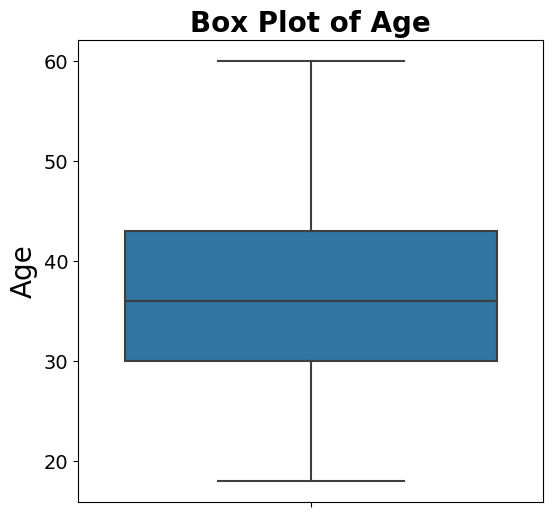

In [21]:
plt.figure(figsize=(6,6))
sns.boxplot(y='Age', data=ibm)
plt.title('Box Plot of Age',fontsize=20,fontweight='bold')
plt.ylabel('Age',fontsize=20)
#plt.xticks(fontsize=15)  # X-axis value font size
plt.yticks(fontsize=14)
#plt.grid(axis='y')
plt.show()

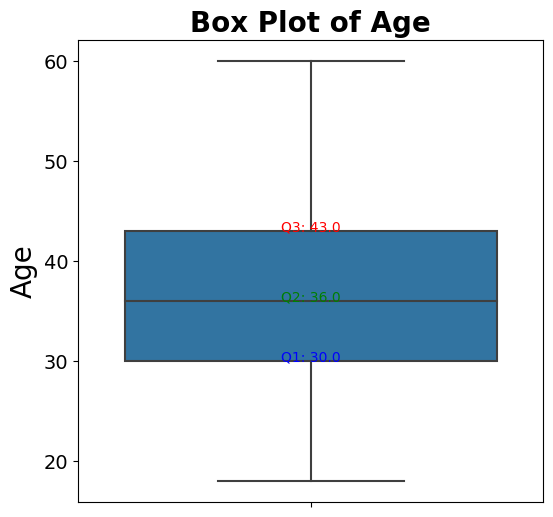

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'ibm' is your dataset
q1 = np.percentile(ibm['Age'], 25)  # First quartile
q2 = np.percentile(ibm['Age'], 50)  # Median (second quartile)
q3 = np.percentile(ibm['Age'], 75)  # Third quartile

plt.figure(figsize=(6, 6))
sns.boxplot(y='Age', data=ibm)
plt.title('Box Plot of Age', fontsize=20, fontweight='bold')
plt.ylabel('Age', fontsize=20)
plt.yticks(fontsize=14)

# Annotate the Q1, Q2, Q3 values
plt.text(0, q1, f'Q1: {q1:.1f}', horizontalalignment='center', color='blue')
plt.text(0, q2, f'Q2: {q2:.1f}', horizontalalignment='center', color='green')
plt.text(0, q3, f'Q3: {q3:.1f}', horizontalalignment='center', color='red')

# Show the plot
plt.show()


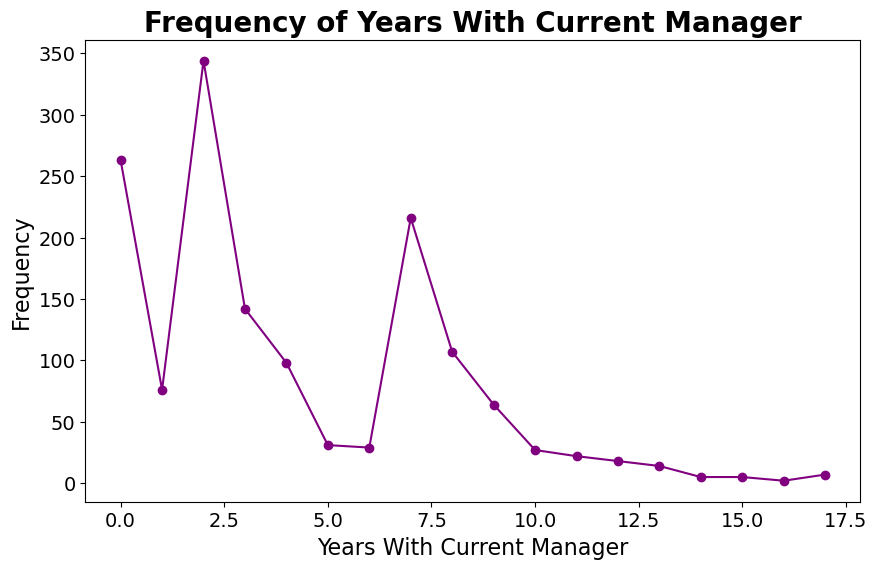

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'ibm' is a pandas DataFrame
# Aggregate data for line plot
data_agg = ibm['YearsWithCurrManager'].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(data_agg.index, data_agg.values, marker='o', linestyle='-', color='purple')
plt.title('Frequency of Years With Current Manager', fontsize=20, fontweight='bold')
plt.xlabel('Years With Current Manager', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


<h3> ATTRITION </h3>

In [24]:
ibm["Attrition"].describe()

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

In [25]:
ibm["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

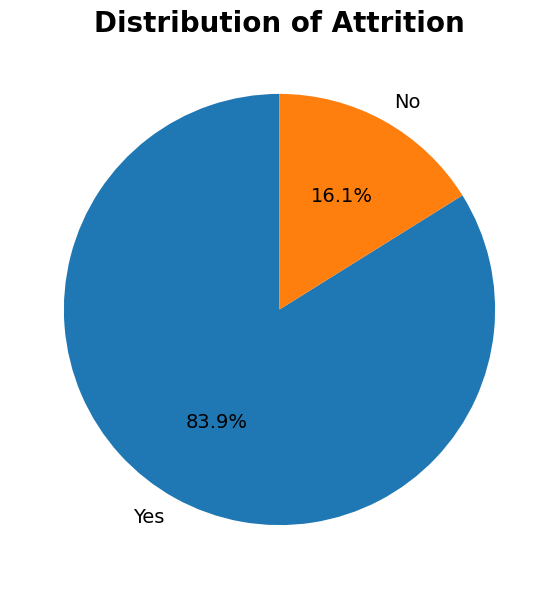

In [26]:
Attrition_counts = ibm['Attrition'].value_counts()
# Create labels for the pie chart
labels = ['Yes', 'No']
plt.figure(figsize=(7,7))
plt.pie(Attrition_counts, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
# Set title
plt.title('Distribution of Attrition',fontweight='bold',fontsize=20)
# Show the plot
plt.show()

In [27]:
ibm['BusinessTravel'].describe()

count              1470
unique                3
top       Travel_Rarely
freq               1043
Name: BusinessTravel, dtype: object

In [28]:
ibm['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

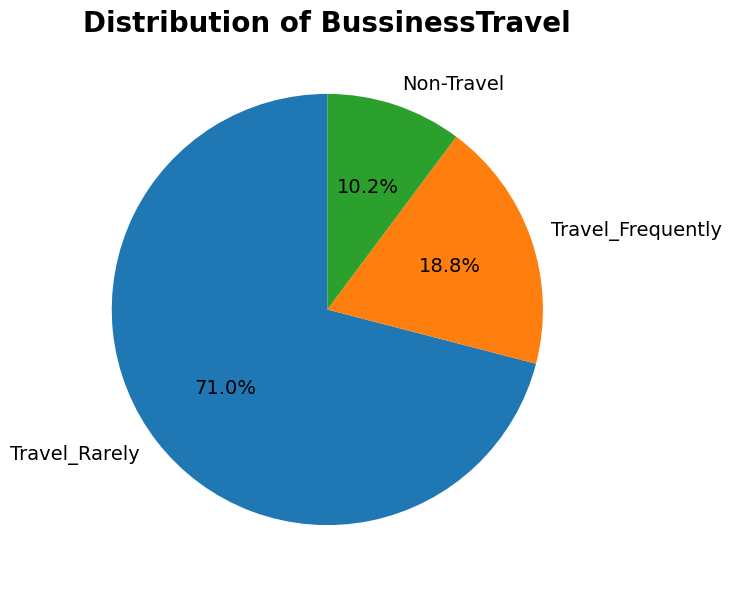

In [29]:
Attrition_counts = ibm['BusinessTravel'].value_counts()
# Create labels for the pie chart
labels = ['Travel_Rarely','Travel_Frequently','Non-Travel']
plt.figure(figsize=(7,7))
plt.pie(Attrition_counts, labels=labels, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 14} )
# Set title
plt.title('Distribution of BussinessTravel',fontweight='bold',fontsize=20)

# Show the plot
plt.show()

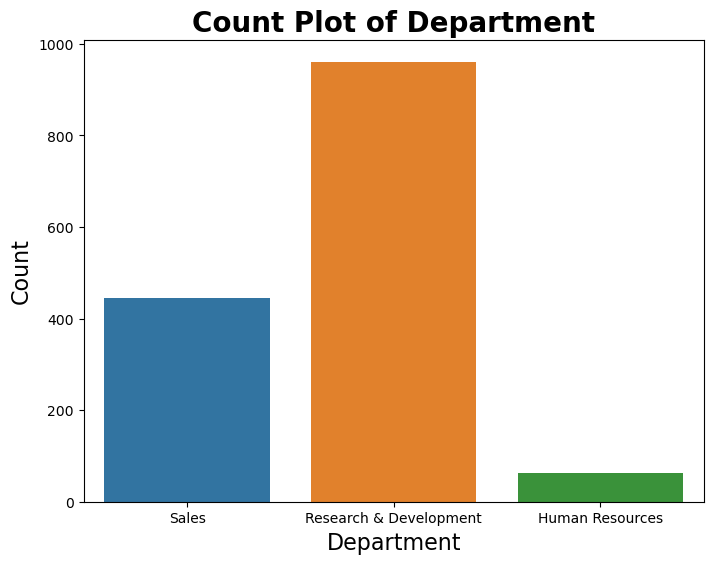

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', data=ibm)

# Add title and axis labels
plt.title('Count Plot of Department', fontweight='bold', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(False)
# Show the plot
plt.show()


<H2> DEPARTMENT AND JOBINVOLVEMENT RELATIONSHIP </H2>

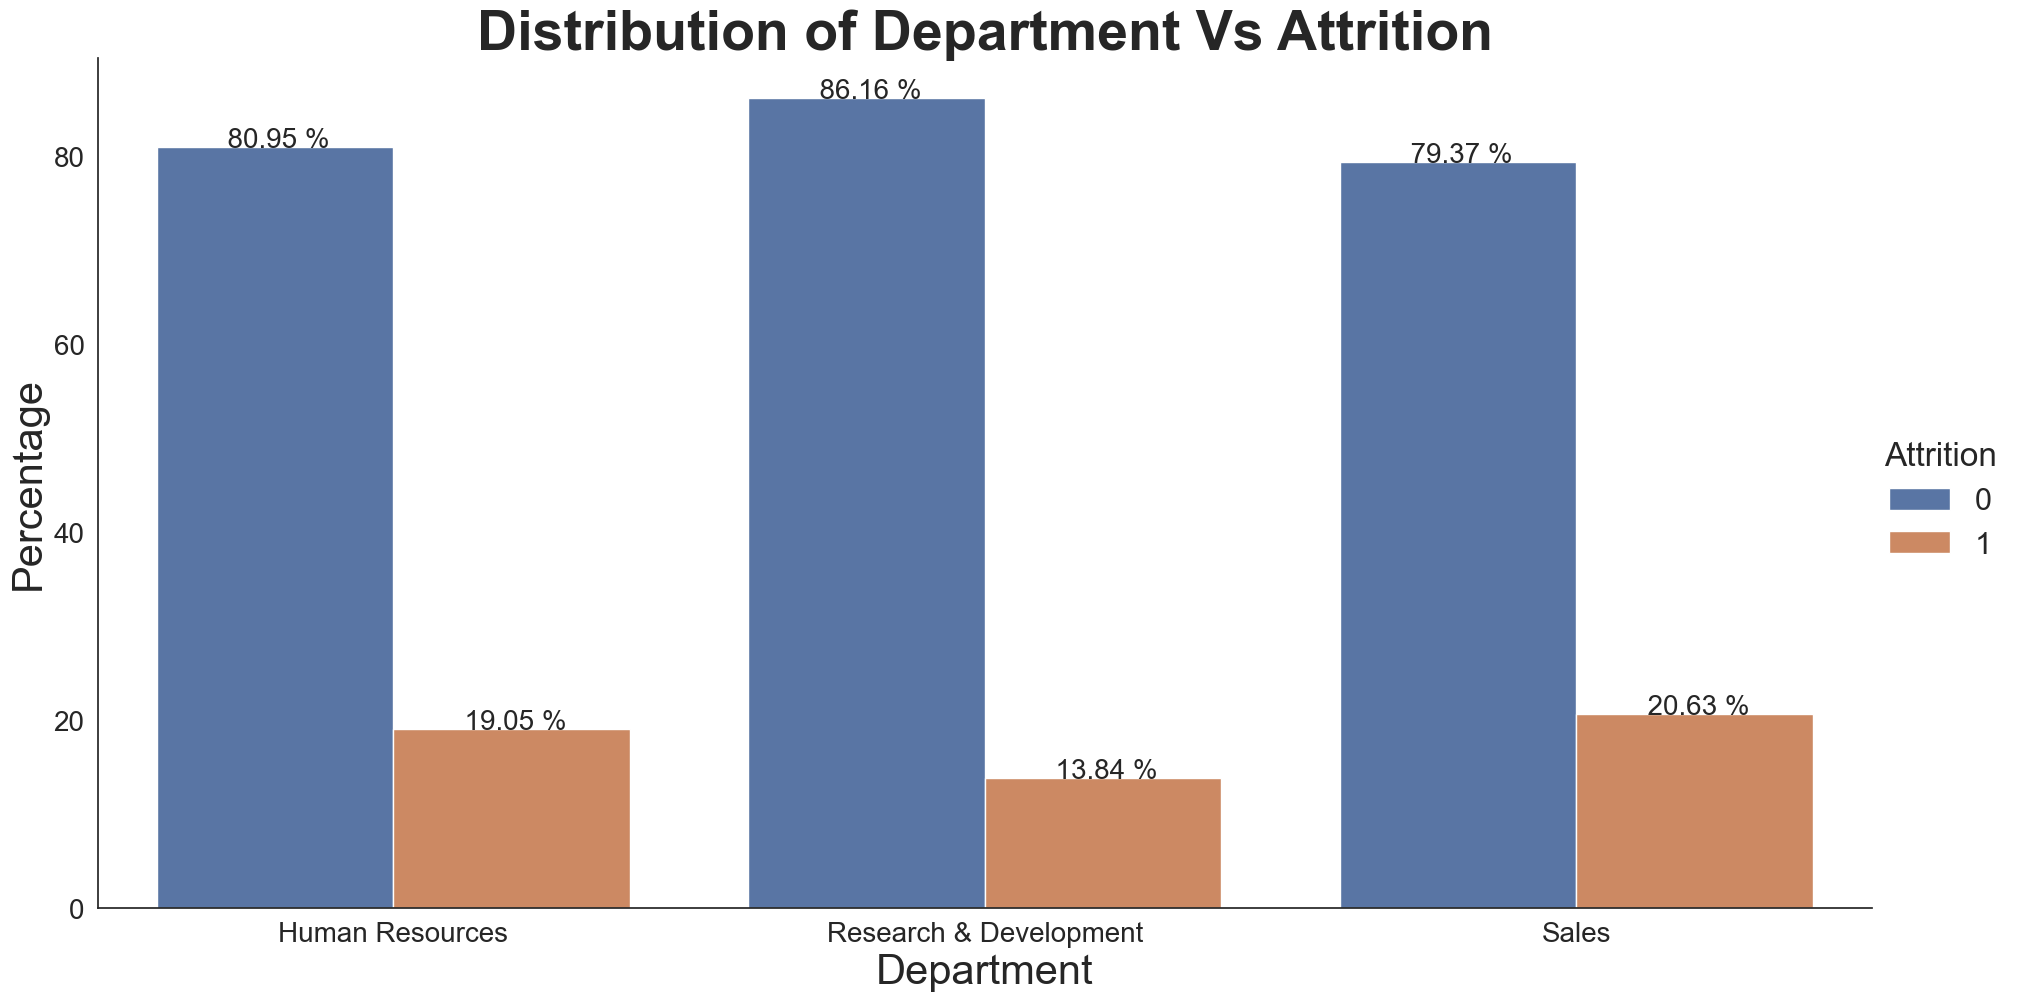

In [31]:
x, y = 'Department', 'Attrition'
df1 = ibm.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

# Set the style to white to remove the blue background
sns.set(style='white', font_scale=2)

g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1, height=10, aspect=25/13)

for p in g.ax.patches:
    txt = '  ' + str(p.get_height().round(2)) + ' % '
    txt_x = p.get_x() + p.get_width() / 2  # Center the text
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt, fontsize=20, rotation=0, ha='center')  # Align text to center

g.ax.set_xlabel(x, fontsize=30)
g.ax.set_ylabel('Percentage', fontsize=30)
g.ax.tick_params(axis='x', labelsize=20)
g.ax.tick_params(axis='y', labelsize=20)

# Remove grid
g.ax.grid(False)
plt.title('Distribution of Department Vs Attrition',fontweight='bold',fontsize=40)
plt.show()

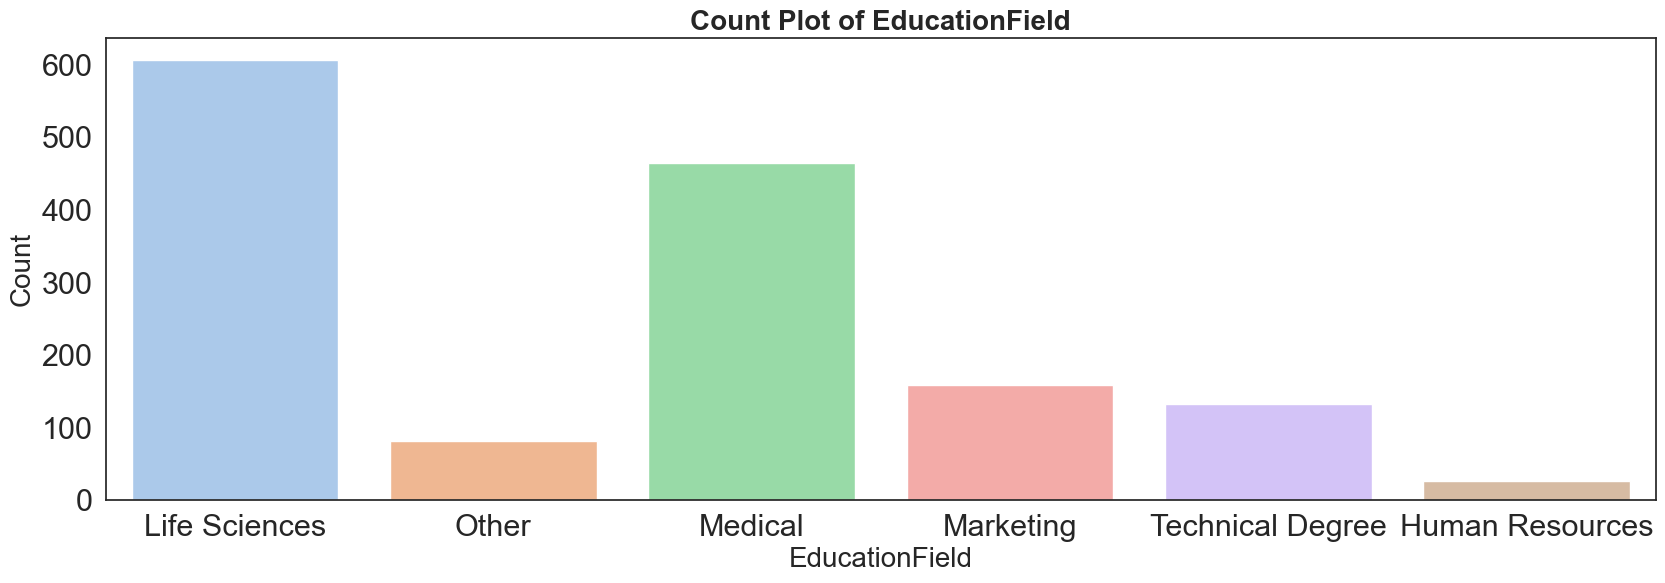

In [32]:
plt.figure(figsize=(20, 6))
sns.countplot(x='EducationField', data=ibm,palette='pastel')

# Add title and axis labels
plt.title('Count Plot of EducationField', fontweight='bold', fontsize=20)
plt.xlabel('EducationField', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid(False)
# Show the plot
plt.show()


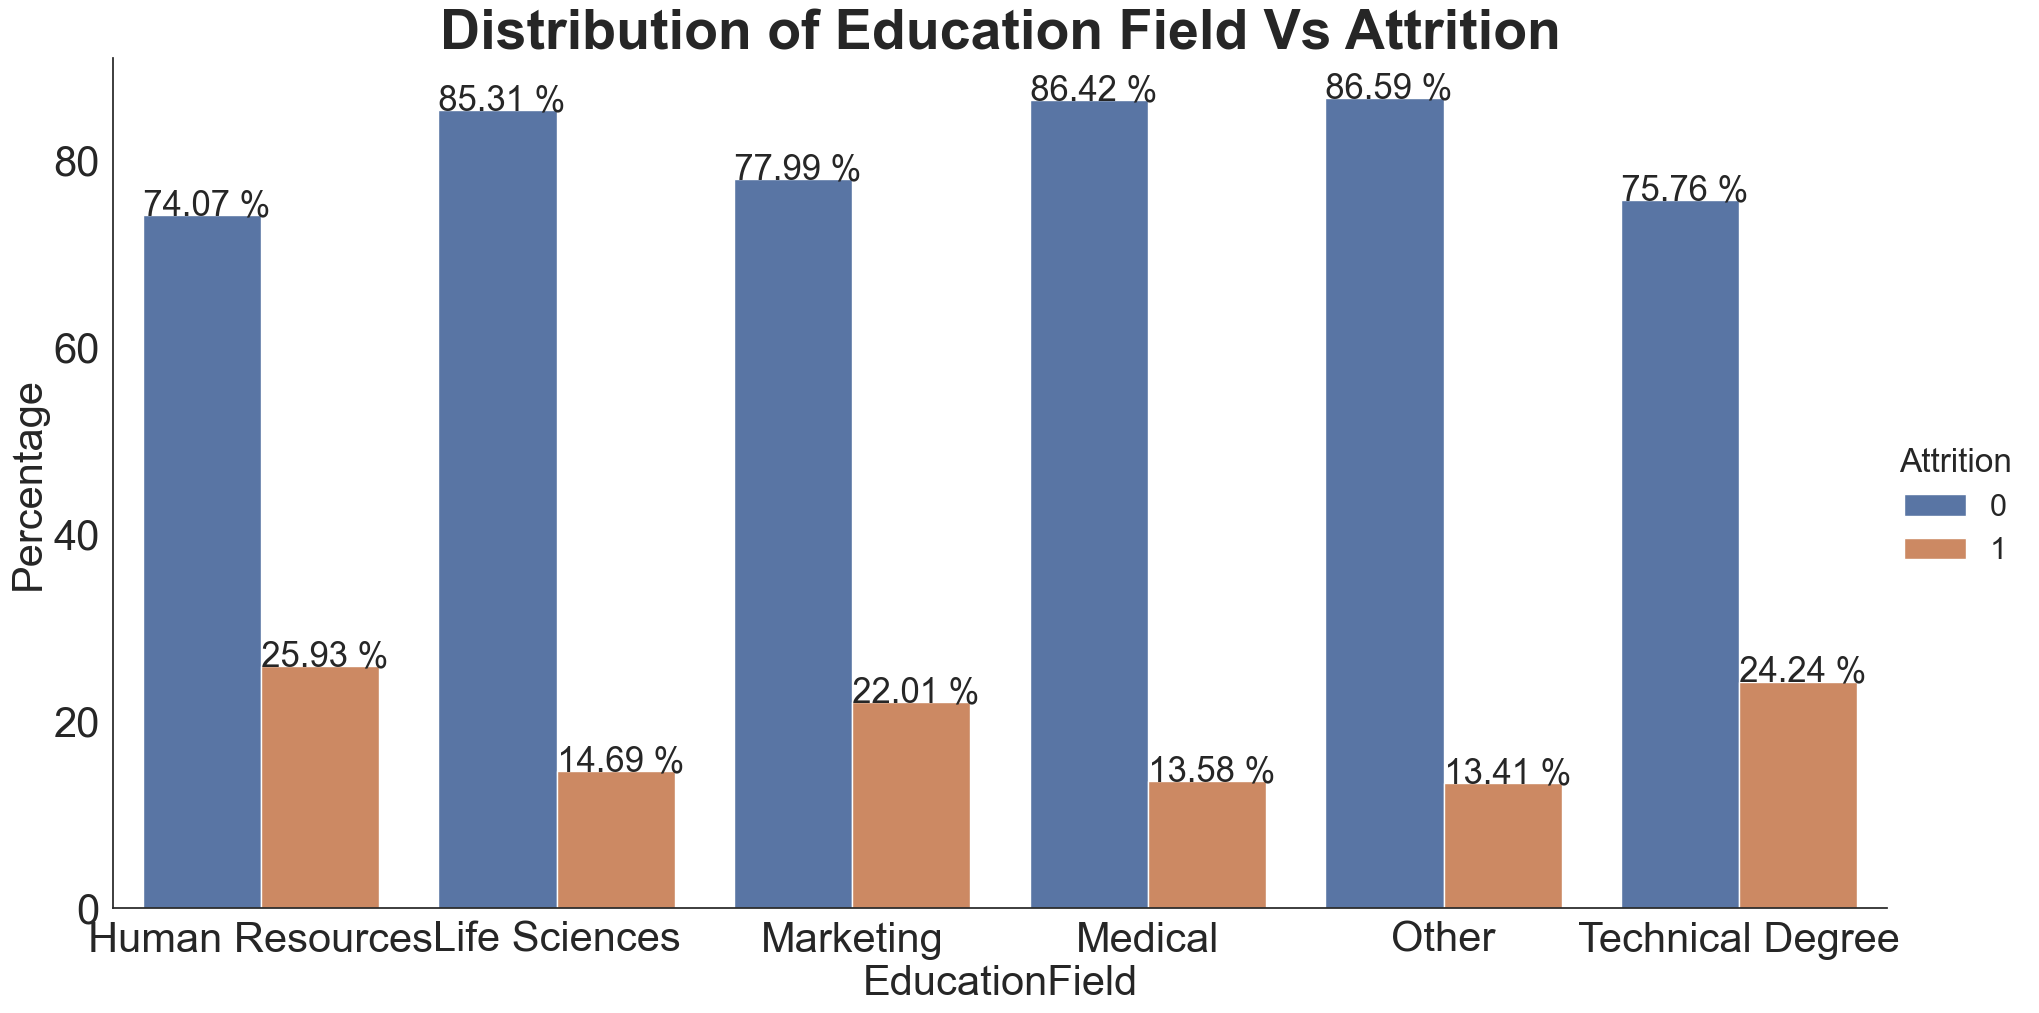

In [33]:
x, y = 'EducationField', 'Attrition'
df1 = ibm.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

# Set the style to white to remove the blue background
sns.set(style='white', font_scale=2)

g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1, height=10, aspect=25/13)

for p in g.ax.patches:
    txt = '  ' + str(p.get_height().round(2)) + ' % '
    txt_x = p.get_x() + p.get_width() / 2  # Center the text
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt, fontsize=25, rotation=0, ha='center')  # Align text to center

g.ax.set_xlabel(x, fontsize=30)
g.ax.set_ylabel('Percentage', fontsize=30)
g.ax.tick_params(axis='x', labelsize=30)
g.ax.tick_params(axis='y', labelsize=30)

# Remove grid
g.ax.grid(False)
plt.title('Distribution of Education Field Vs Attrition',fontweight='bold',fontsize=40)
plt.show()

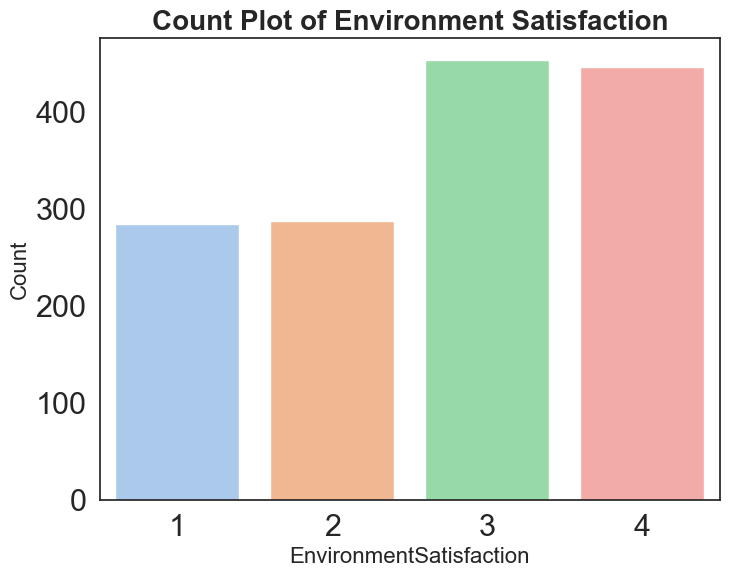

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='EnvironmentSatisfaction', data=ibm,palette='pastel')

# Add title and axis labels
plt.title('Count Plot of Environment Satisfaction', fontweight='bold', fontsize=20)
plt.xlabel('EnvironmentSatisfaction', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(False)
# Show the plot
plt.show()

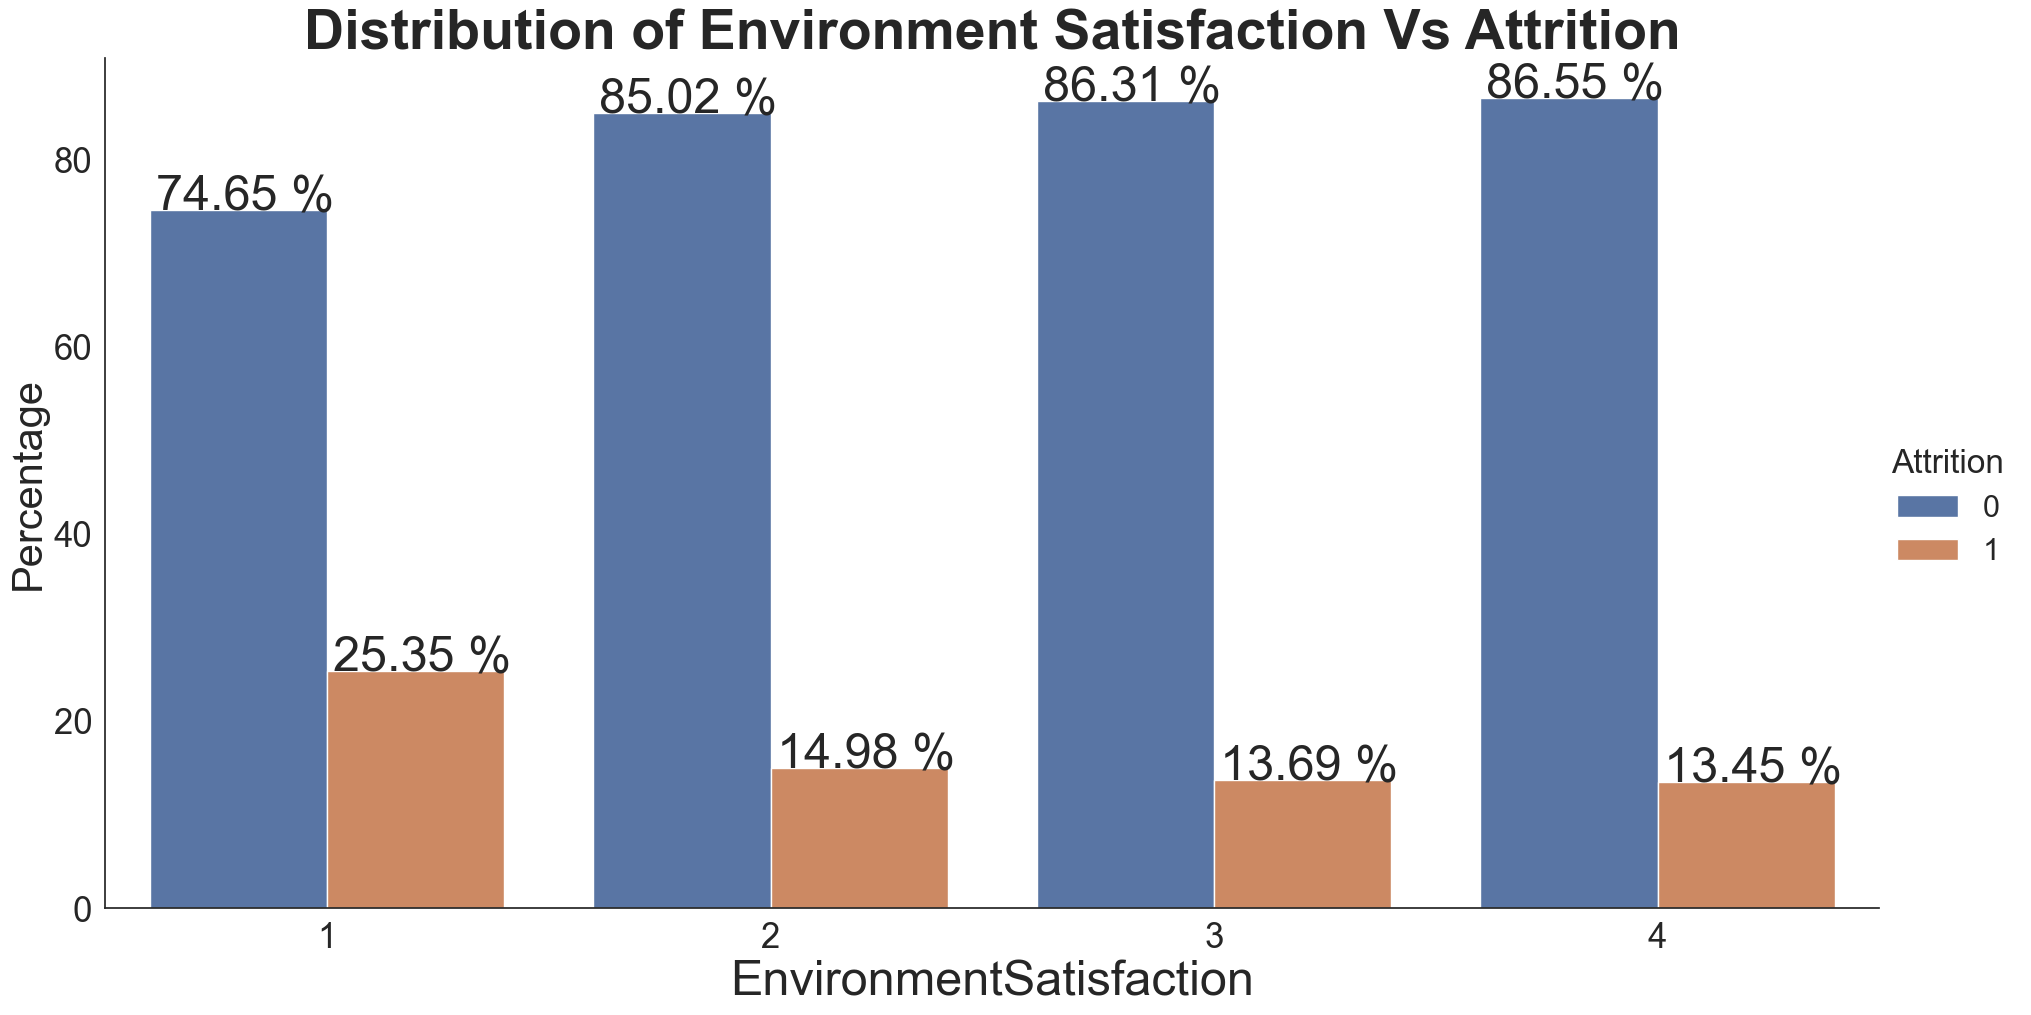

In [35]:
x, y = 'EnvironmentSatisfaction', 'Attrition'
df1 = ibm.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

# Set the style to white to remove the blue background
sns.set(style='white', font_scale=2)

g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1, height=10, aspect=25/13)

for p in g.ax.patches:
    txt = '  ' + str(p.get_height().round(2)) + ' % '
    txt_x = p.get_x() + p.get_width() / 2  # Center the text
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt, fontsize=35, rotation=0, ha='center')  # Align text to center

g.ax.set_xlabel(x, fontsize=35)
g.ax.set_ylabel('Percentage', fontsize=30)
g.ax.tick_params(axis='x', labelsize=25)
g.ax.tick_params(axis='y', labelsize=25)

# Remove grid
g.ax.grid(False)
plt.title('Distribution of Environment Satisfaction Vs Attrition',fontweight='bold',fontsize=40)
plt.show()

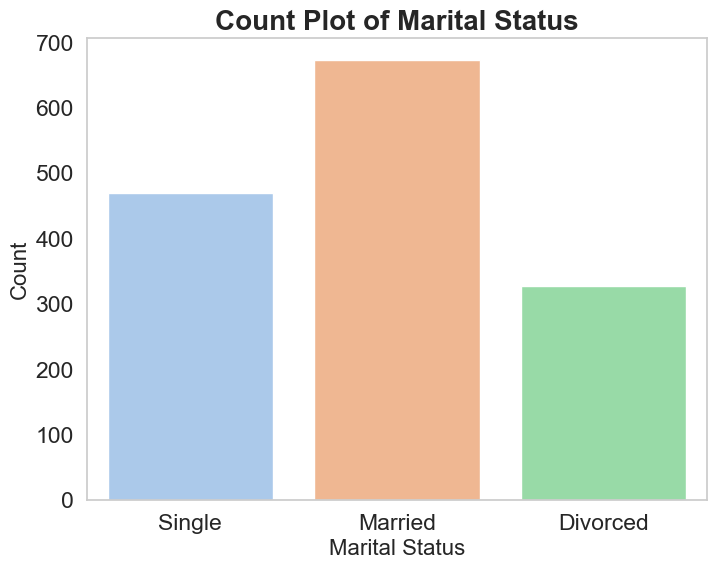

In [36]:
sns.set(style='whitegrid', font_scale=1.5)

# Count plot for Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalStatus', data=ibm, palette='pastel')

# Add title and axis labels
plt.title('Count Plot of Marital Status', fontweight='bold', fontsize=20)
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(False)
# Show the plot
plt.show()


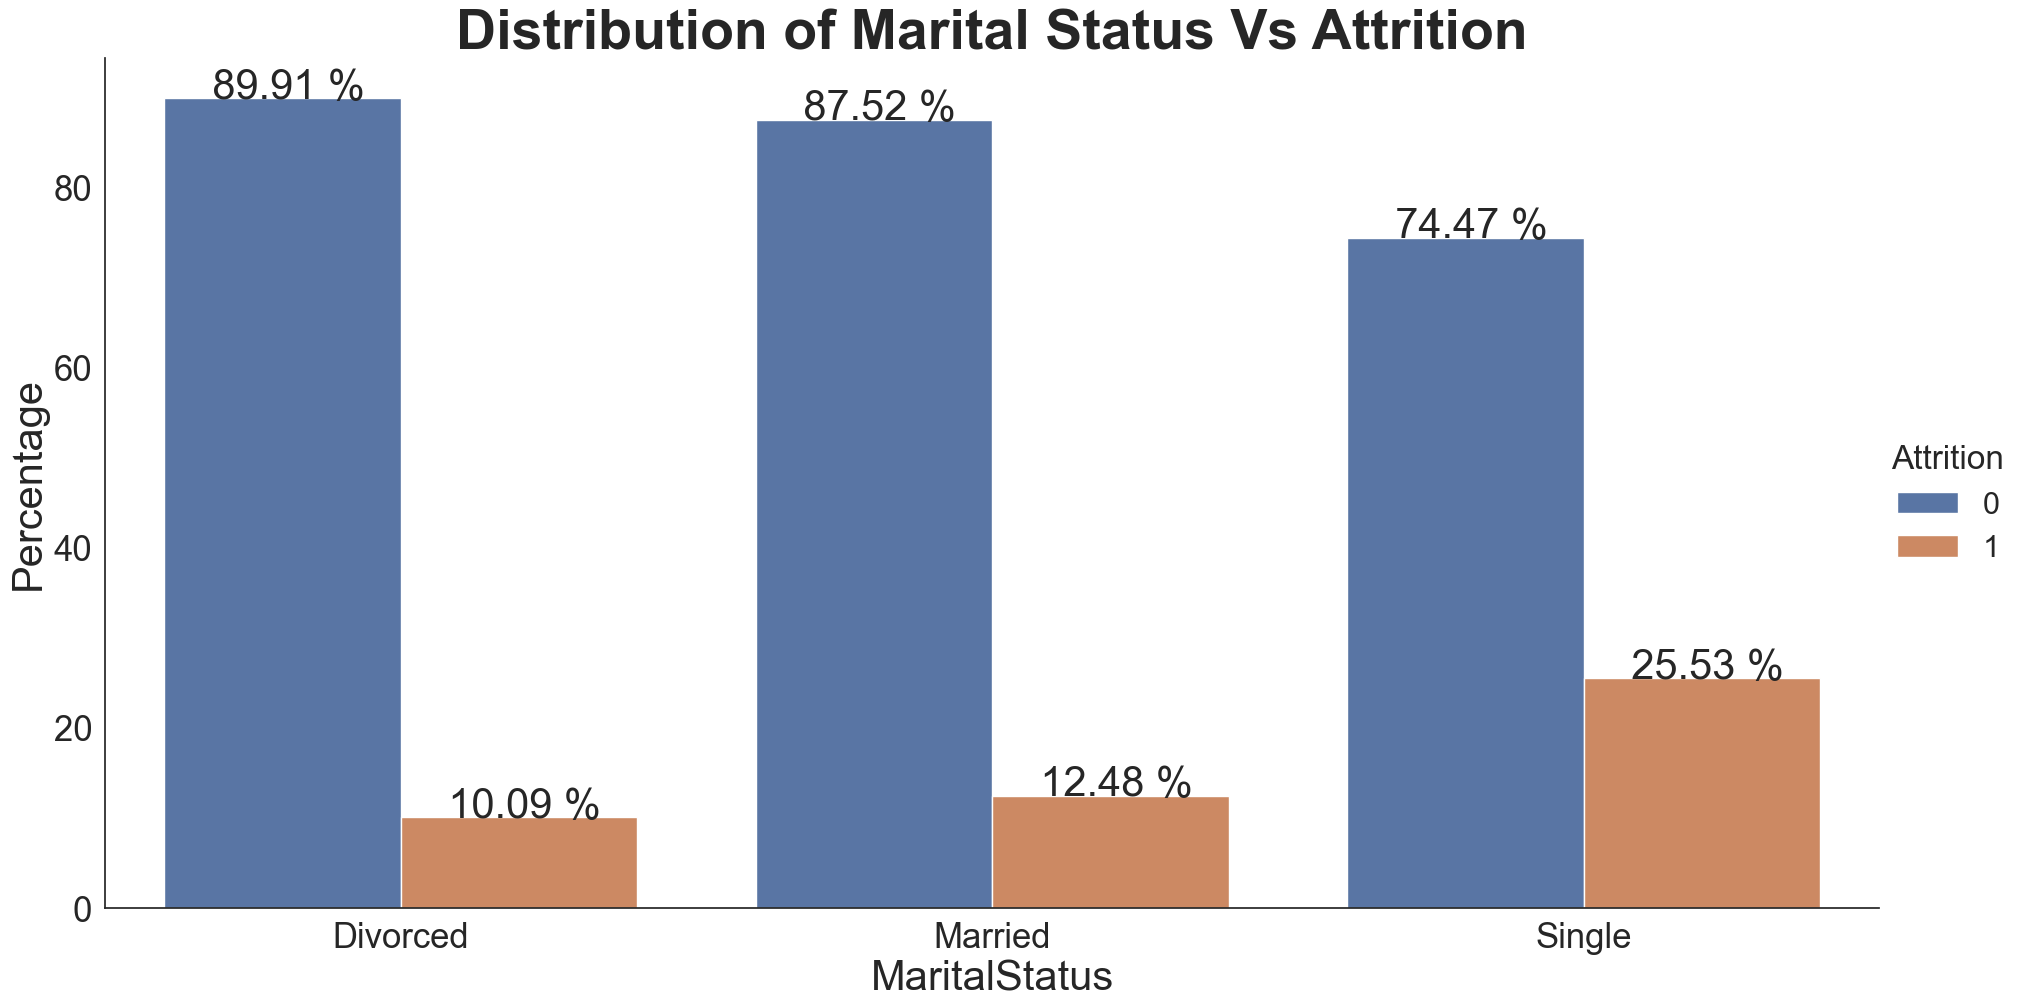

In [37]:
x, y = 'MaritalStatus', 'Attrition'
df1 = ibm.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

# Set the style to white to remove the blue background
sns.set(style='white', font_scale=2)

g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1, height=10, aspect=25/13)

for p in g.ax.patches:
    txt = '  ' + str(p.get_height().round(2)) + ' % '
    txt_x = p.get_x() + p.get_width() / 2  # Center the text
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt, fontsize=30, rotation=0, ha='center')  # Align text to center

g.ax.set_xlabel(x, fontsize=30)
g.ax.set_ylabel('Percentage', fontsize=30)
g.ax.tick_params(axis='x', labelsize=25)
g.ax.tick_params(axis='y', labelsize=25)

# Remove grid
g.ax.grid(False)
plt.title('Distribution of Marital Status Vs Attrition',fontweight='bold',fontsize=40)
plt.show()

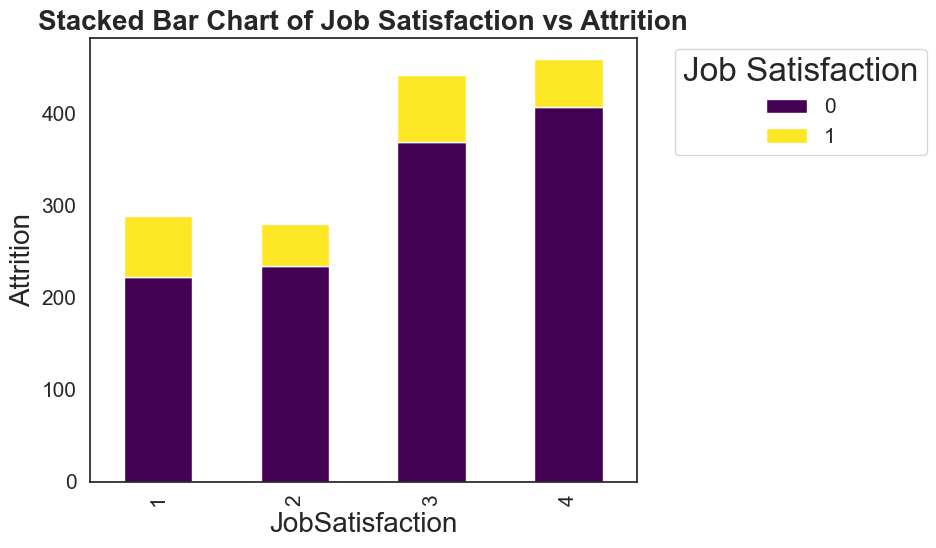

In [38]:
pivot_df = pd.crosstab(ibm['JobSatisfaction'],ibm['Attrition'])

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Customizing the chart
plt.title('Stacked Bar Chart of Job Satisfaction vs Attrition',fontsize=20,fontweight='bold')
plt.xlabel('JobSatisfaction',fontsize=20)
plt.ylabel('Attrition',fontsize=20)
plt.xticks(fontsize=15)  # X-axis value font size
plt.yticks(fontsize=15)
plt.legend(title='Job Satisfaction',fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

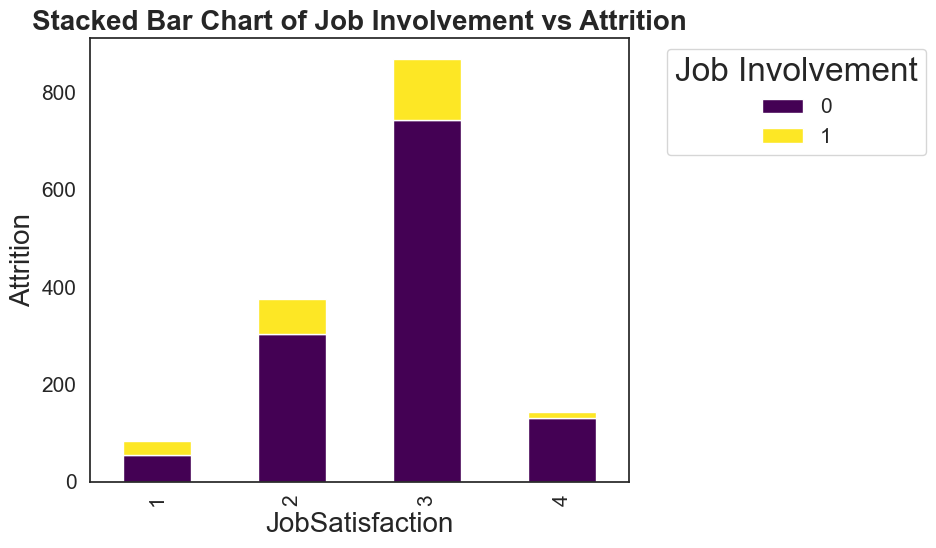

In [39]:
pivot_df = pd.crosstab(ibm['JobInvolvement'],ibm['Attrition'])

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Customizing the chart
plt.title('Stacked Bar Chart of Job Involvement vs Attrition',fontsize=20,fontweight='bold')
plt.xlabel('JobSatisfaction',fontsize=20)
plt.ylabel('Attrition',fontsize=20)
plt.xticks(fontsize=15)  # X-axis value font size
plt.yticks(fontsize=15)
plt.legend(title='Job Involvement',fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

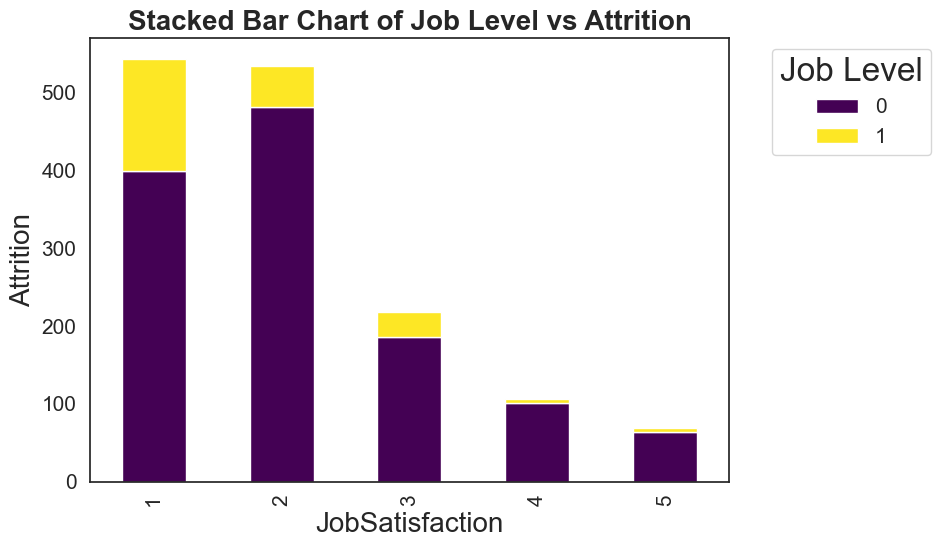

In [40]:
pivot_df = pd.crosstab(ibm['JobLevel'],ibm['Attrition'])

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Customizing the chart
plt.title('Stacked Bar Chart of Job Level vs Attrition',fontsize=20,fontweight='bold')
plt.xlabel('JobSatisfaction',fontsize=20)
plt.ylabel('Attrition',fontsize=20)
plt.xticks(fontsize=15)  # X-axis value font size
plt.yticks(fontsize=15)
plt.legend(title='Job Level',fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

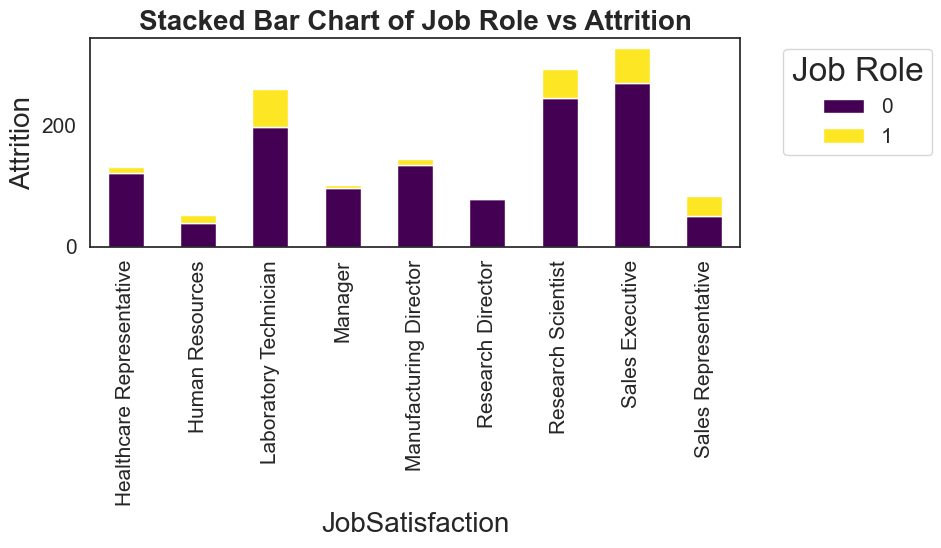

In [41]:
pivot_df = pd.crosstab(ibm['JobRole'],ibm['Attrition'])

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Customizing the chart
plt.title('Stacked Bar Chart of Job Role vs Attrition',fontsize=20,fontweight='bold')
plt.xlabel('JobSatisfaction',fontsize=20)
plt.ylabel('Attrition',fontsize=20)
plt.xticks(fontsize=15)  # X-axis value font size
plt.yticks(fontsize=15)
plt.legend(title='Job Role',fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

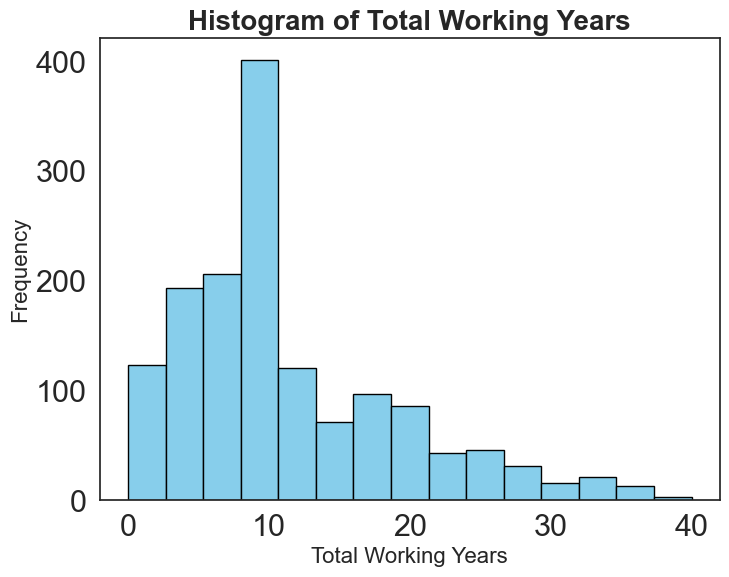

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(ibm['TotalWorkingYears'], bins=15, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Total Working Years', fontweight='bold', fontsize=20)
plt.xlabel('Total Working Years', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Show the plot
plt.grid(False)
plt.show()

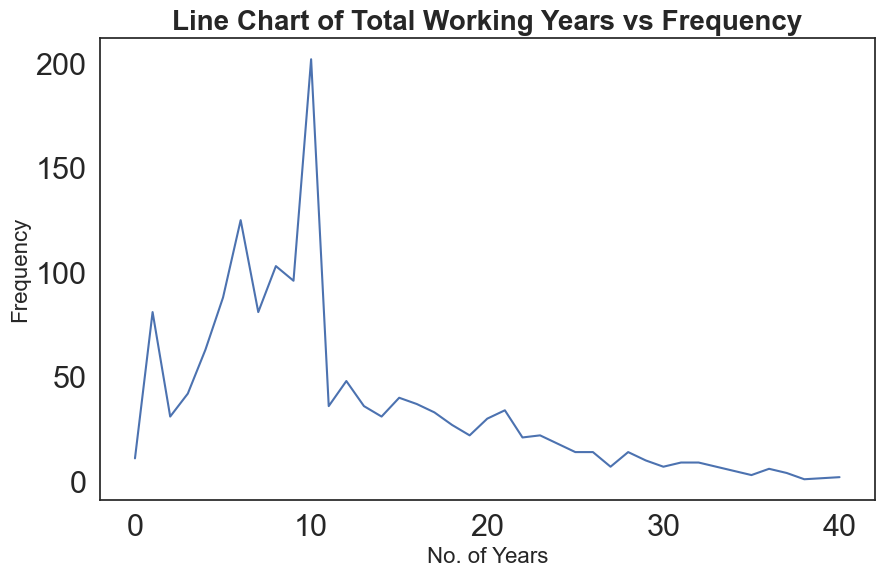

In [43]:
# Setting the style and font scale for the chart
sns.set(style='white', font_scale=2)

# Plot the line chart for "TotalWorkingYears"
ibm['TotalWorkingYears'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))

# Add x-axis and y-axis labels
plt.xlabel('No. of Years', fontsize=16)  # Label for x-axis
plt.ylabel('Frequency', fontsize=16)     # Label for y-axis

# Set title for the plot
plt.title('Line Chart of Total Working Years vs Frequency', fontweight='bold', fontsize=20)

# Remove grid
plt.grid(False)

# Show the plot
plt.show()


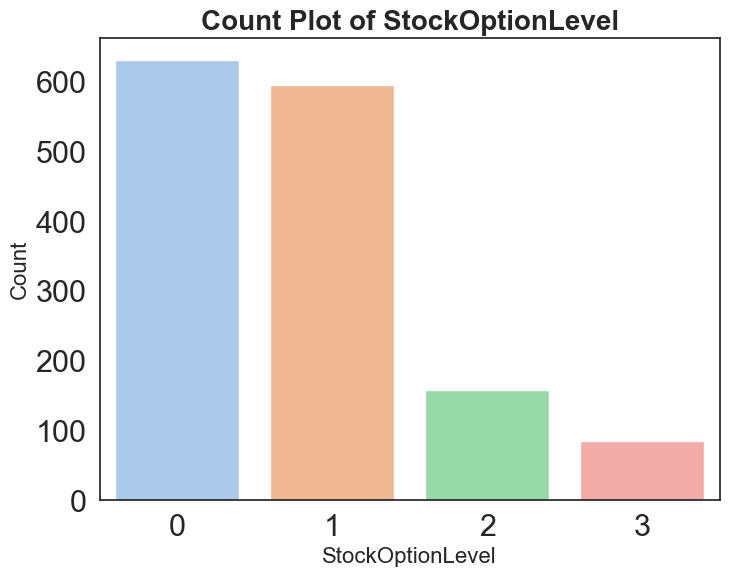

In [44]:

plt.figure(figsize=(8, 6))
sns.countplot(x='StockOptionLevel', data=ibm, palette='pastel')

# Add title and axis labels
plt.title('Count Plot of StockOptionLevel', fontweight='bold', fontsize=20)
plt.xlabel('StockOptionLevel', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(False)
# Show the plot
plt.show()


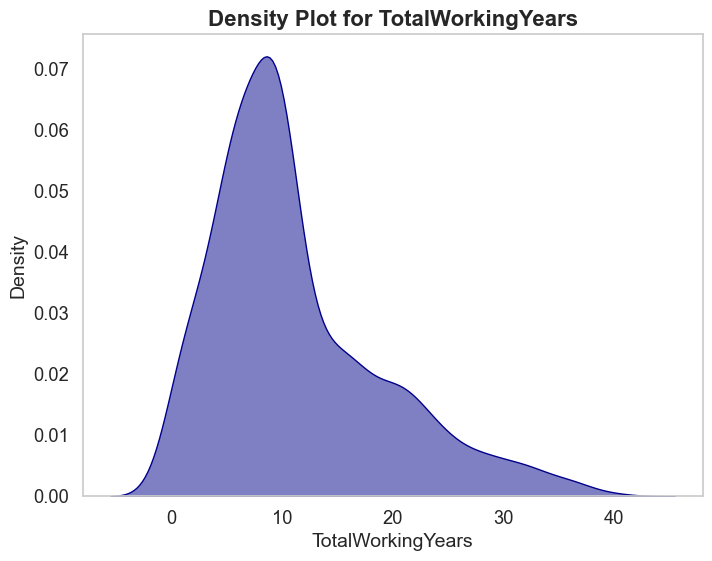

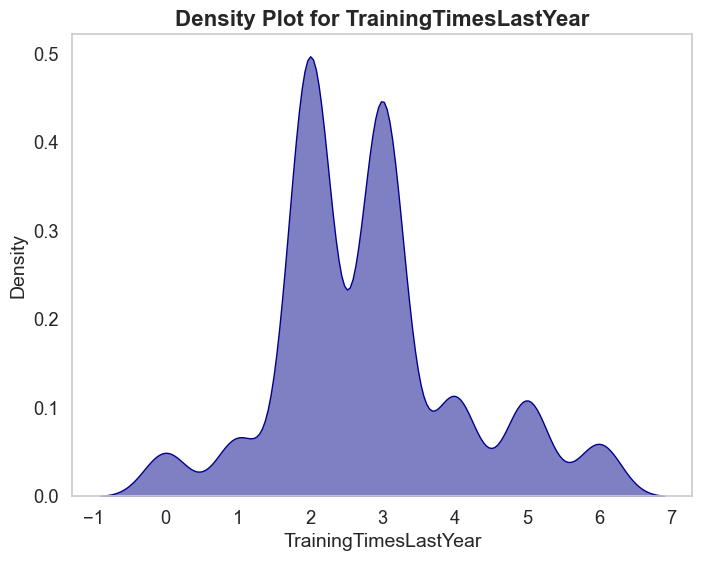

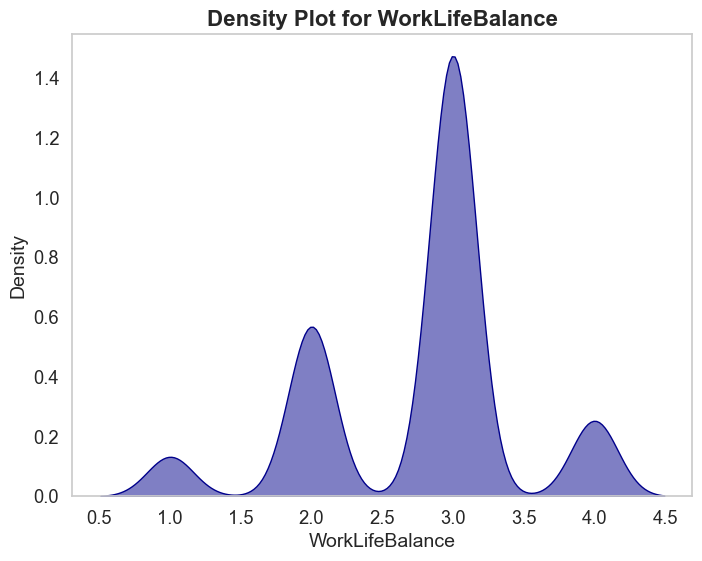

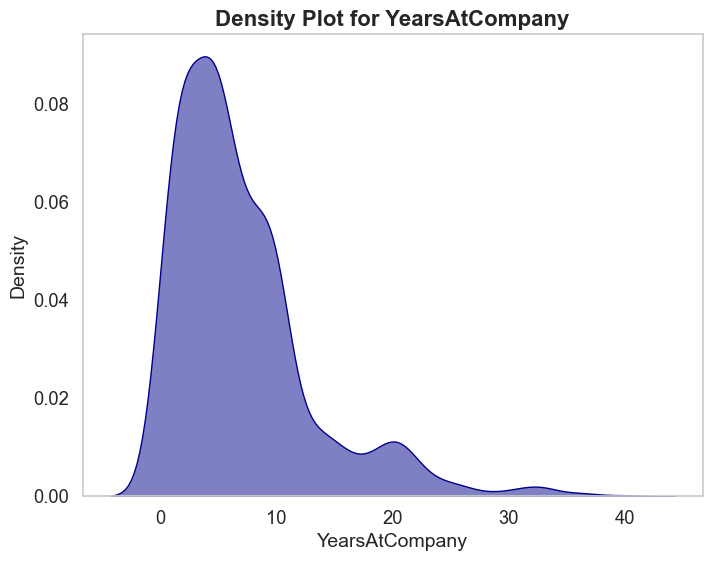

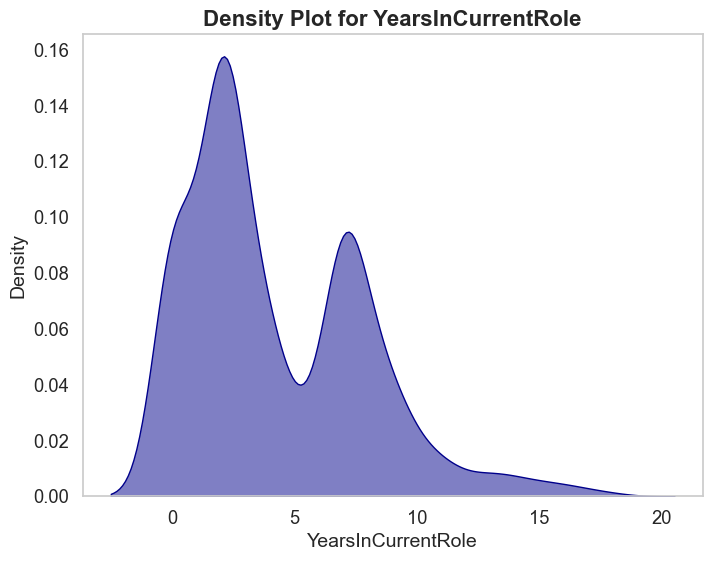

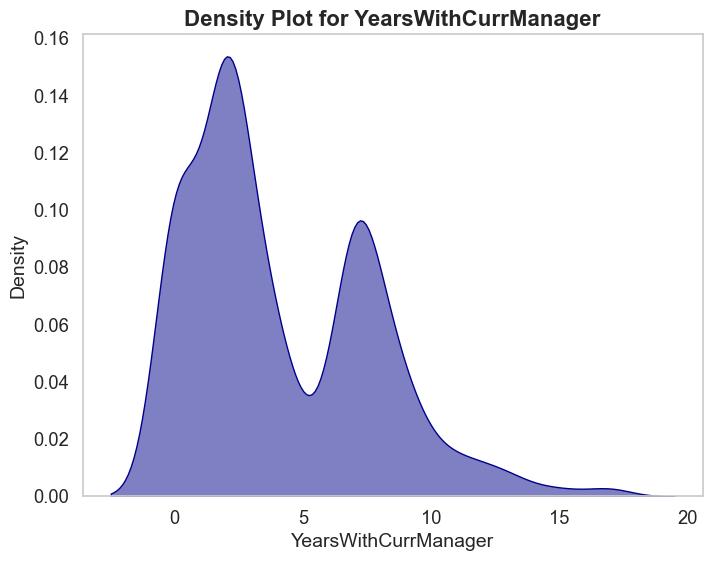

In [45]:
#import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_columns = ['TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

# Set style for plots
sns.set(style='whitegrid', font_scale=1.2)

# Loop through numeric columns to create density plots
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=ibm[col], fill=True, color='darkblue', alpha=0.5)
    plt.title(f'Density Plot for {col}', fontweight='bold', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(False)
    plt.show()


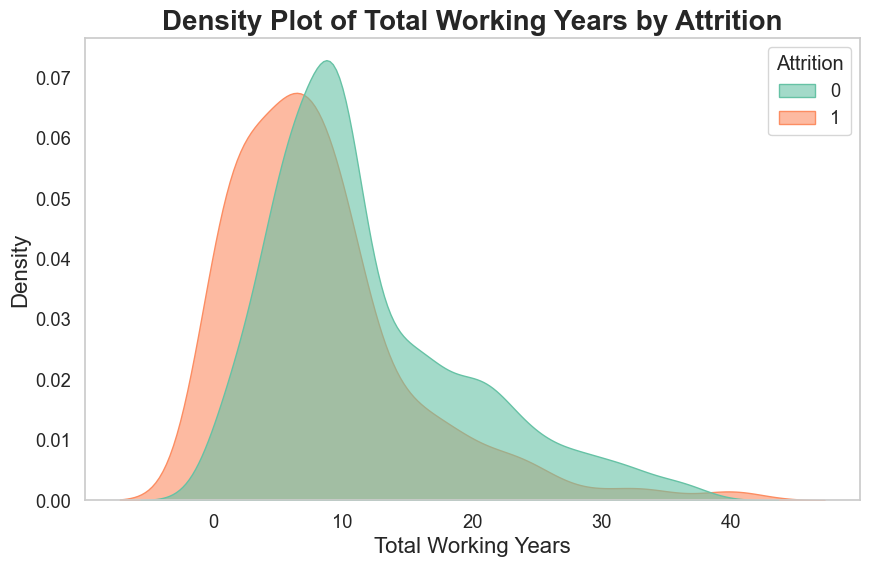

In [46]:

# Density plot for TotalWorkingYears vs Attrition
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ibm, x='TotalWorkingYears', hue='Attrition', fill=True, 
            common_norm=False, palette='Set2', alpha=0.6)

# Add title and labels
plt.title('Density Plot of Total Working Years by Attrition', fontweight='bold', fontsize=20)
plt.xlabel('Total Working Years', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Show the plot
plt.grid(False)
plt.show()


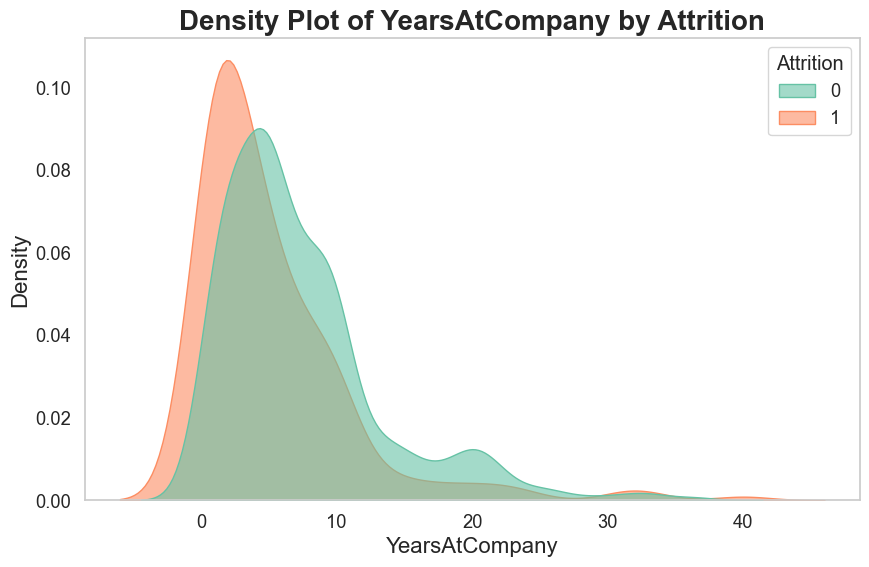

In [47]:
# Density plot for TotalWorkingYears vs Attrition
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ibm, x='YearsAtCompany', hue='Attrition', fill=True, 
            common_norm=False, palette='Set2', alpha=0.6)

# Add title and labels
plt.title('Density Plot of YearsAtCompany by Attrition', fontweight='bold', fontsize=20)
plt.xlabel('YearsAtCompany', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Show the plot
plt.grid(False)
plt.show()


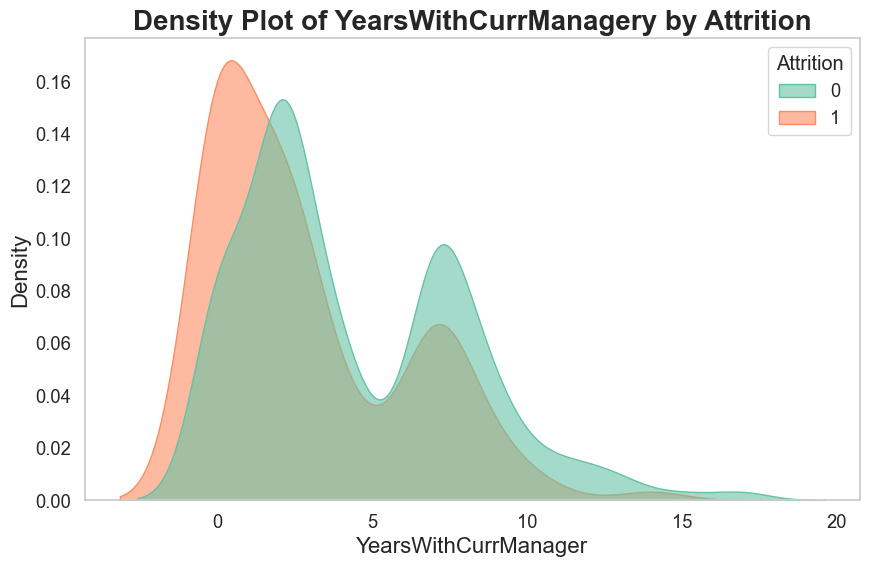

In [48]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=ibm, x='YearsWithCurrManager', hue='Attrition', fill=True, 
            common_norm=False, palette='Set2', alpha=0.6)

# Add title and labels
plt.title('Density Plot of YearsWithCurrManagery by Attrition', fontweight='bold', fontsize=20)
plt.xlabel('YearsWithCurrManager', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Show the plot
plt.grid(False)
plt.show()

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder



# Step 1: Encode the target variable and categorical features
label_encoder = LabelEncoder()
ibm['Attrition'] = label_encoder.fit_transform(ibm['Attrition'])
ibm['BusinessTravel'] = label_encoder.fit_transform(ibm['BusinessTravel'])
ibm['Department'] = label_encoder.fit_transform(ibm['Department'])
ibm['EducationField'] = label_encoder.fit_transform(ibm['EducationField'])
ibm['JobRole'] = label_encoder.fit_transform(ibm['JobRole'])
ibm['MaritalStatus'] = label_encoder.fit_transform(ibm['MaritalStatus'])
ibm['OverTime'] = label_encoder.fit_transform(ibm['OverTime'])
               
# Step 2: Split the data
X = ibm.drop('Attrition', axis=1)
y = ibm['Attrition']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
      # Enable probability estimates
}


In [50]:
from sklearn import metrics
from sklearn.metrics import (accuracy_score,precision_score,recall_score,r2_score,mean_squared_error)

dic = {"Model": [], "Accuracy_Score": [], "Precision_Score": [], "Recall_Score": []}

# Loop through the models, fit, and evaluate
for name, model in models.items():
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)

    # Calculate metrics
    accuracy = accuracy_score(test_y, y_pred)
    precision = precision_score(test_y, y_pred)
    recall = recall_score(test_y, y_pred)

    # Print model evaluation
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("-----Data Evaluation-----")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)

    # Append metrics to dictionary
    dic["Model"].append(name)
    dic["Accuracy_Score"].append(accuracy)
    dic["Precision_Score"].append(precision)
    dic["Recall_Score"].append(recall)

# Convert dictionary to DataFrame for better visualization
results_df = pd.DataFrame(dic)
print("\nEvaluation Metrics:")
print(results_df)

--------------------------------------------------------------
Model: Decision Tree
-----Data Evaluation-----
Accuracy:  0.8027210884353742
Precision:  0.30612244897959184
Recall:  0.38461538461538464
--------------------------------------------------------------
Model: XGBoost
-----Data Evaluation-----
Accuracy:  0.8843537414965986
Precision:  0.631578947368421
Recall:  0.3076923076923077
--------------------------------------------------------------
Model: Logistic Regression
-----Data Evaluation-----
Accuracy:  0.8707482993197279
Precision:  0.5294117647058824
Recall:  0.23076923076923078


C:\Users\MASI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------------------
Model: Gradient Boosting
-----Data Evaluation-----
Accuracy:  0.8877551020408163
Precision:  0.6666666666666666
Recall:  0.3076923076923077

Evaluation Metrics:
                 Model  Accuracy_Score  Precision_Score  Recall_Score
0        Decision Tree        0.802721         0.306122      0.384615
1              XGBoost        0.884354         0.631579      0.307692
2  Logistic Regression        0.870748         0.529412      0.230769
3    Gradient Boosting        0.887755         0.666667      0.307692


In [51]:
final_model = pd.DataFrame(dic)
final_model

,Model,Accuracy_Score,Precision_Score,Recall_Score
0,Decision Tree,0.802721,0.306122,0.384615
1,XGBoost,0.884354,0.631579,0.307692
2,Logistic Regression,0.870748,0.529412,0.230769
3,Gradient Boosting,0.887755,0.666667,0.307692


In [52]:
final_model.sort_values("Accuracy_Score", axis = 0, ascending = False)

,Model,Accuracy_Score,Precision_Score,Recall_Score
3,Gradient Boosting,0.887755,0.666667,0.307692
1,XGBoost,0.884354,0.631579,0.307692
2,Logistic Regression,0.870748,0.529412,0.230769
0,Decision Tree,0.802721,0.306122,0.384615


In [53]:
from sklearn.model_selection import cross_val_score

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
      # Enable probability estimates
}
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Display results
print("Cross-validation accuracy scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [0.84013605 0.86734694 0.87755102 0.86054422 0.88095238]
Average accuracy: 0.8653061224489796


C:\Users\MASI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\MASI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MASI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\MASI\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but 

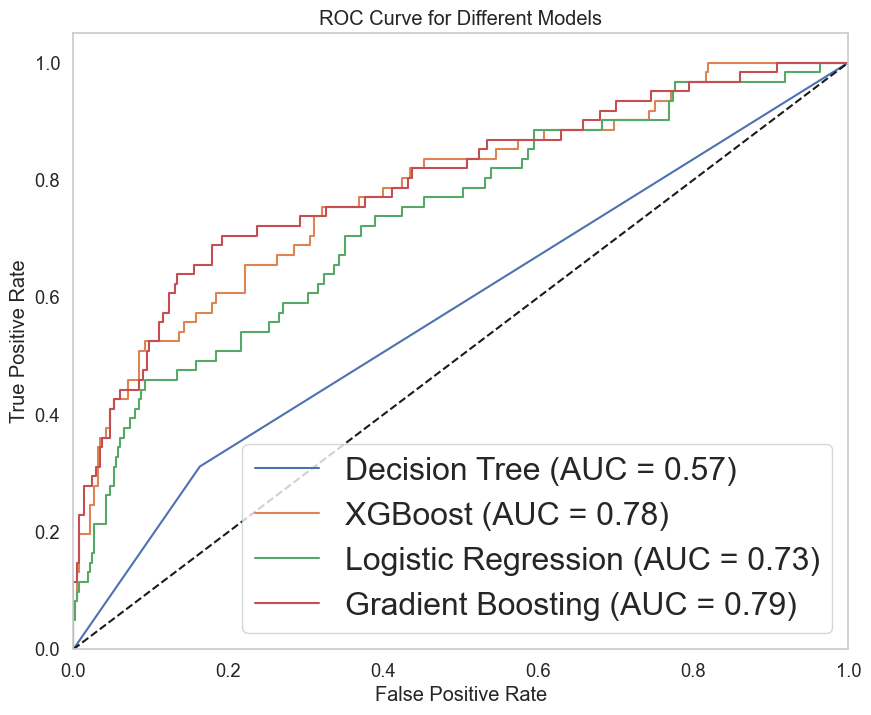

In [54]:
## import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Sample dataset creation
X = ibm.drop('Attrition', axis=1)
y = ibm['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure data is in the correct format
X_test = np.array(X_test)
y_test = np.array(y_test)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),  # Enable probability estimates
}

plt.figure(figsize=(10, 8))

# Loop through each model and plot the ROC curve
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Check if model has predict_proba method
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Get probability for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')  # Include AUC in the legend
    else:
        print(f"{name} does not support probability predictions.")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right',fontsize=23)
plt.grid()
plt.show()

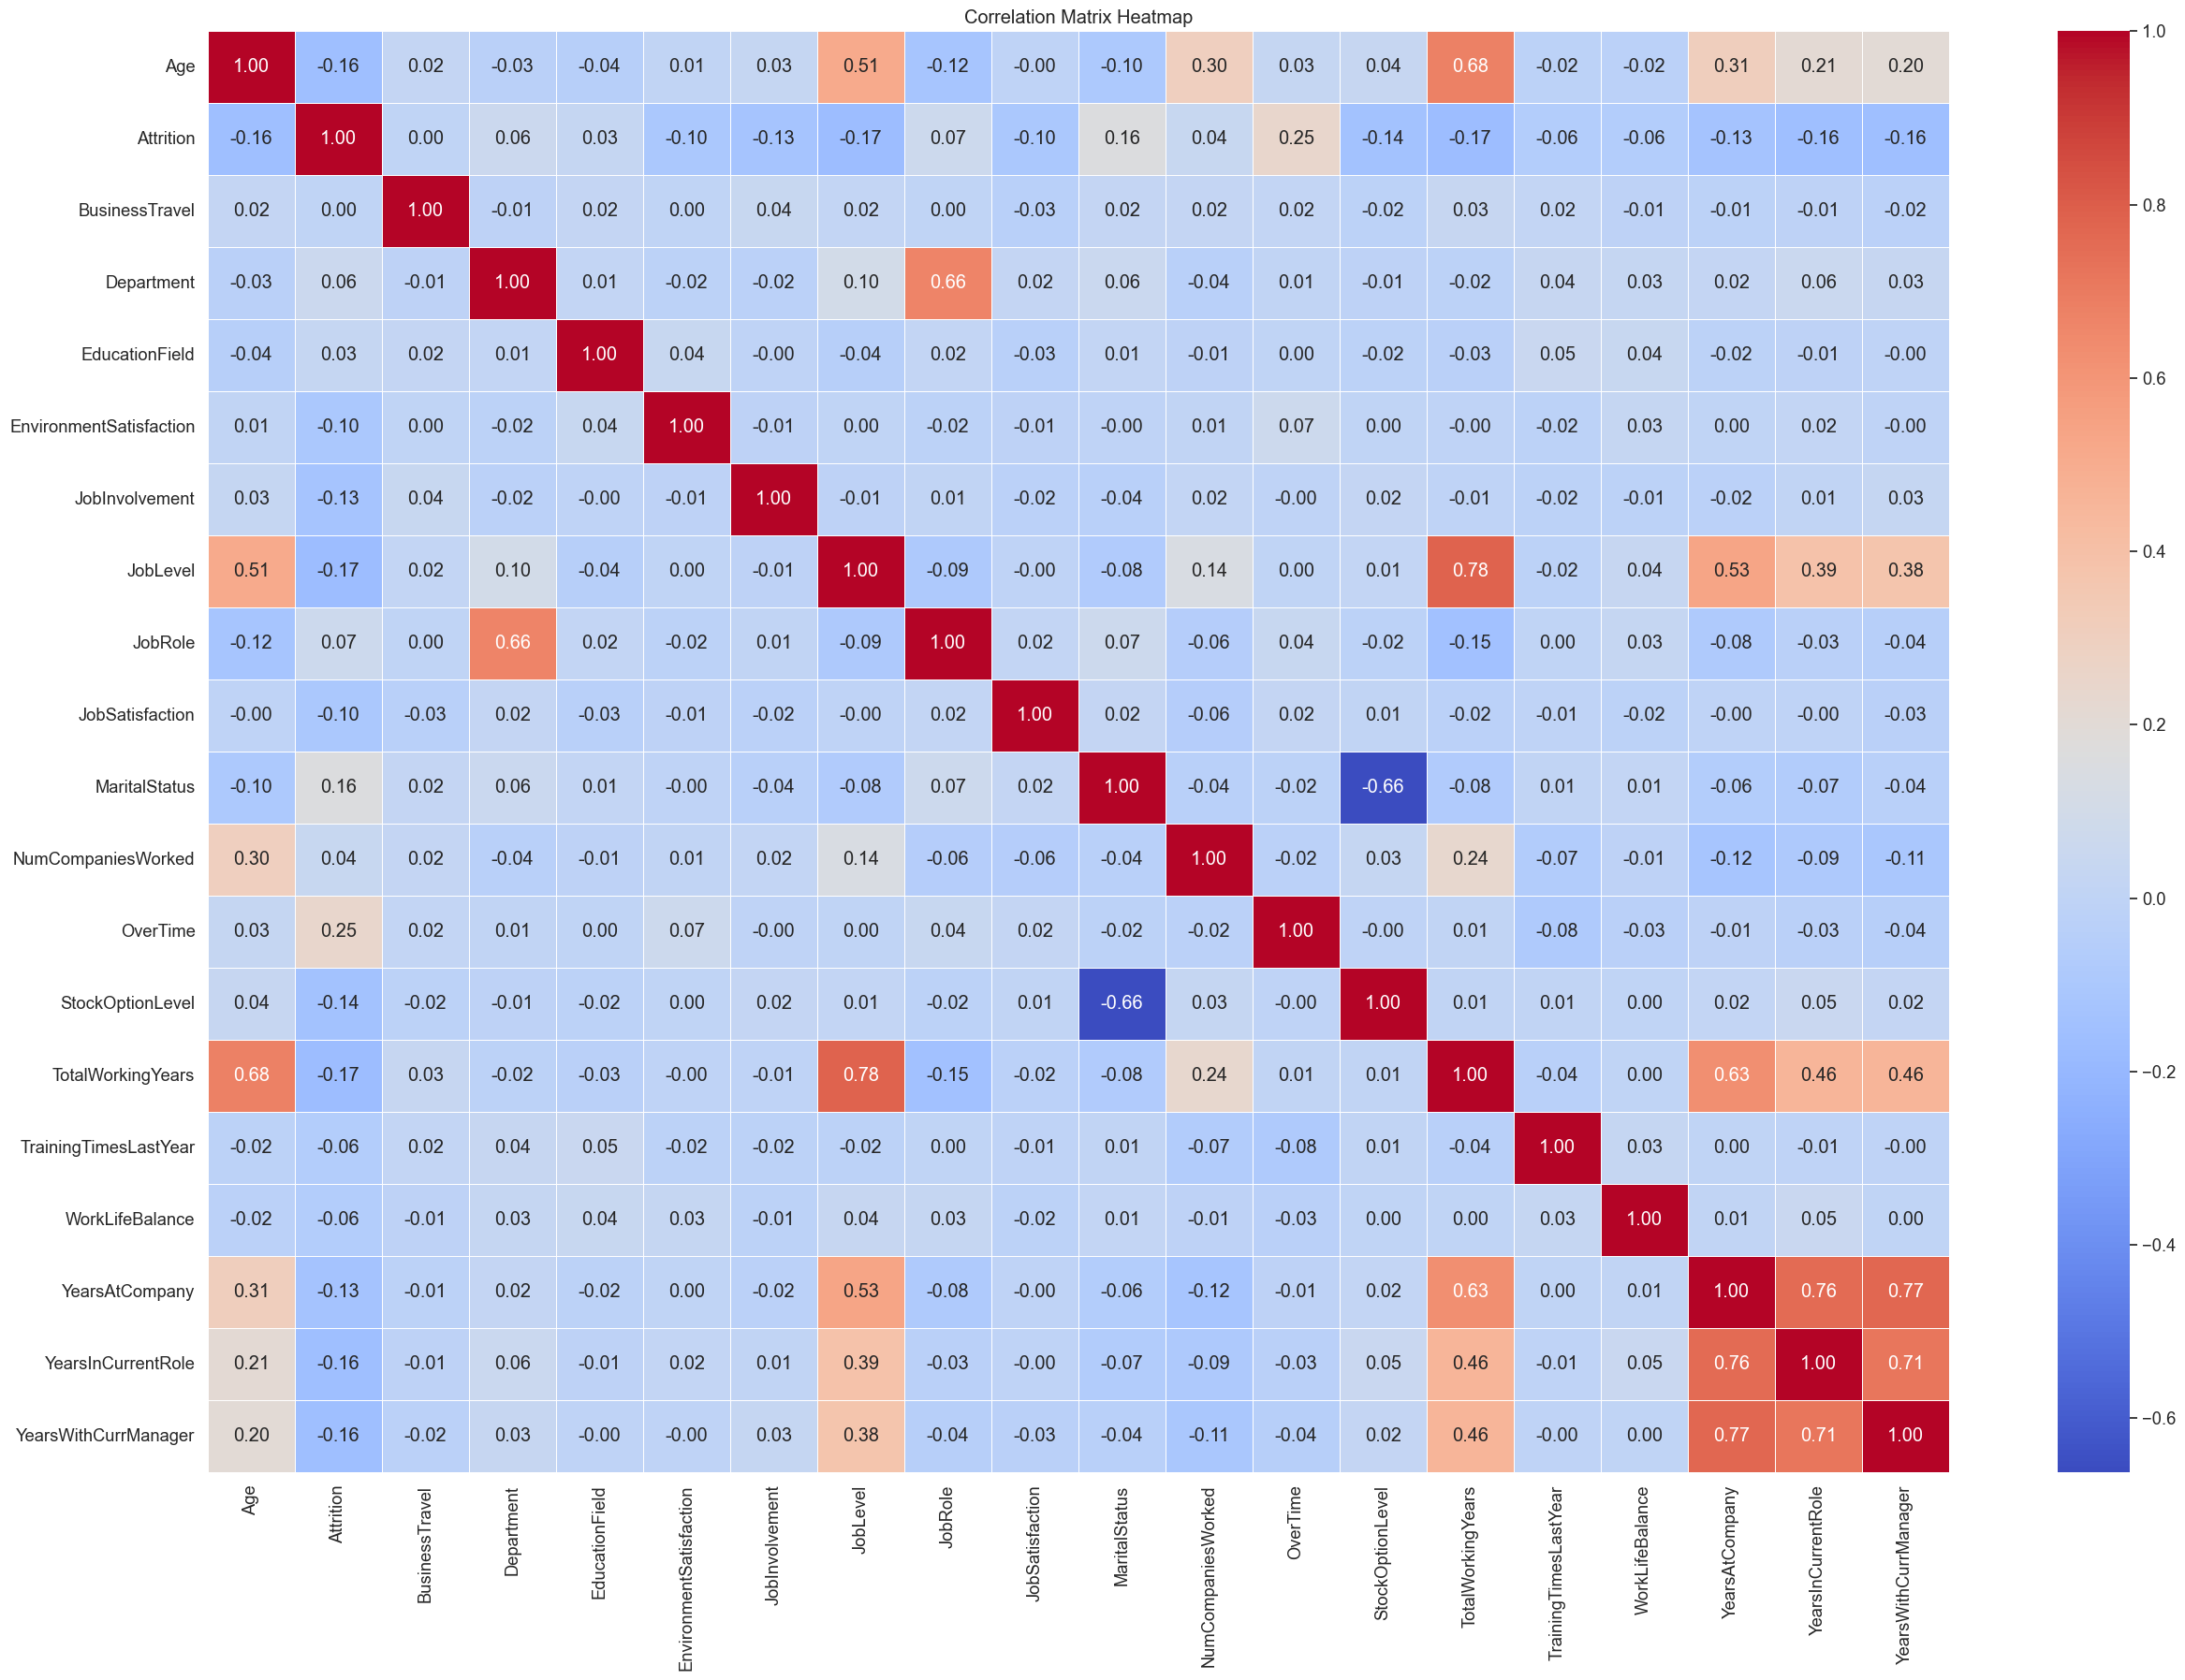

In [55]:
correlation_matrix = ibm.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

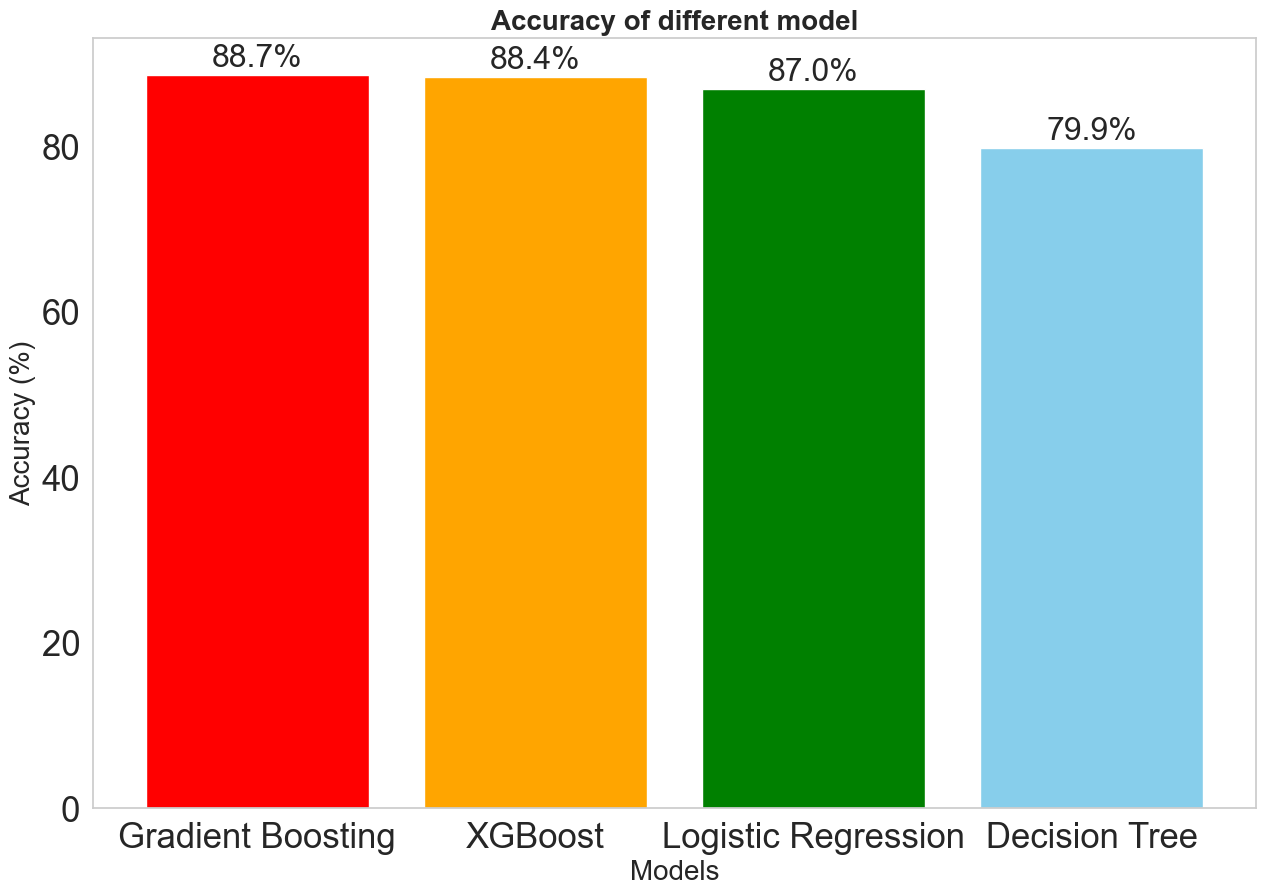

In [56]:
import matplotlib.pyplot as plt

# Example data
models = ['Gradient Boosting','XGBoost','Logistic Regression','Decision Tree']
accuracy = [88.7, 88.4, 87.0, 79.9]  # Accuracy in percentage
#colors=['red','blue','green','orange']
colors = ['red', 'orange', 'green', 'skyblue']

# Plotting the bar chart
plt.figure(figsize=(15,10))
plt.bar(models,accuracy,color=colors)

# Add title and labels
plt.title('Accuracy of different model', fontweight='bold', fontsize=20)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xticks(fontsize=25)  # X-axis value font size
plt.yticks(fontsize=25)
# Add values on top of bars
for i, val in enumerate(accuracy):
    plt.text(i, val + 1, f'{val}%', ha='center', fontsize=23)

# Show the plot
plt.grid(False)
plt.show()
